### Importing Necessary Modules

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib.ticker as mticker

### Cleaning the Data

In [211]:
df = pd.read_csv("/Users/neel/Downloads/nycpropertysales.csv")

In [170]:
df.copy()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [171]:
del df['Unnamed: 0']
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [172]:
# Renaming columns to lowercase and replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [173]:
# Convert cells with '-' and spaces to NaN
df.replace(r'^\s*-\s*$', np.nan, regex=True, inplace=True)

# Drop Square Feet columns as they have many NaN values
del df['gross_square_feet']
del df['land_square_feet']

# Drop rows containing NaN values
df.dropna(inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [174]:
# Check data types of each column
data_types = df.dtypes
print(data_types)

borough                            int64
neighborhood                      object
building_class_category           object
tax_class_at_present              object
block                              int64
lot                                int64
ease-ment                         object
building_class_at_present         object
address                           object
apartment_number                  object
zip_code                           int64
residential_units                  int64
commercial_units                   int64
total_units                        int64
year_built                         int64
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale    object
sale_price                        object
sale_date                         object
dtype: object


In [175]:
# Convert sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Convert sale_price to int64
df['sale_price'] = df['sale_price'].replace('[\$,]', '', regex=True).astype(int)

In [176]:
# Create new columns for Year, Month, Day of Year and Day of Month
df['year'] = df['sale_date'].dt.year.astype(int)
df['month'] = df['sale_date'].dt.month.astype(int)
df['day_of_year'] = df['sale_date'].dt.dayofyear
df['day_of_month'] = df['sale_date'].dt.day.astype(int)

In [177]:
# Define a mapping between borough codes and their corresponding names
borough_mapping = {1: 'Manhattan', 2: 'The Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
df['borough_names'] = df['borough'].apply(lambda x: borough_mapping.get(x, 'Unknown'))

In [178]:
# Eliminate rows with sales prices of 0
df = df[df['sale_price'] != 0]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [179]:
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,year,month,day_of_year,day_of_month,borough_names
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,1900,2,C2,6625000,2017-07-19,2017,7,200,19,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,1913,2,C4,3936272,2016-09-23,2016,9,267,23,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,1900,2,C2,8000000,2016-11-17,2016,11,322,17,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,1920,2,C4,3192840,2016-09-23,2016,9,267,23,Manhattan
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,1920,2,D9,16232000,2016-11-07,2016,11,312,7,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59754,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,1998,1,B9,450000,2016-11-28,2016,11,333,28,Staten Island
59755,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,1998,1,B9,550000,2017-04-21,2017,4,111,21,Staten Island
59756,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,1925,1,B2,460000,2017-07-05,2017,7,186,5,Staten Island
59757,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,2001,4,K6,11693337,2016-12-21,2016,12,356,21,Staten Island


### Exploratory Data Analysis (EDA)

Median Price: 600000.0
Mean Price: 830186.2243174537


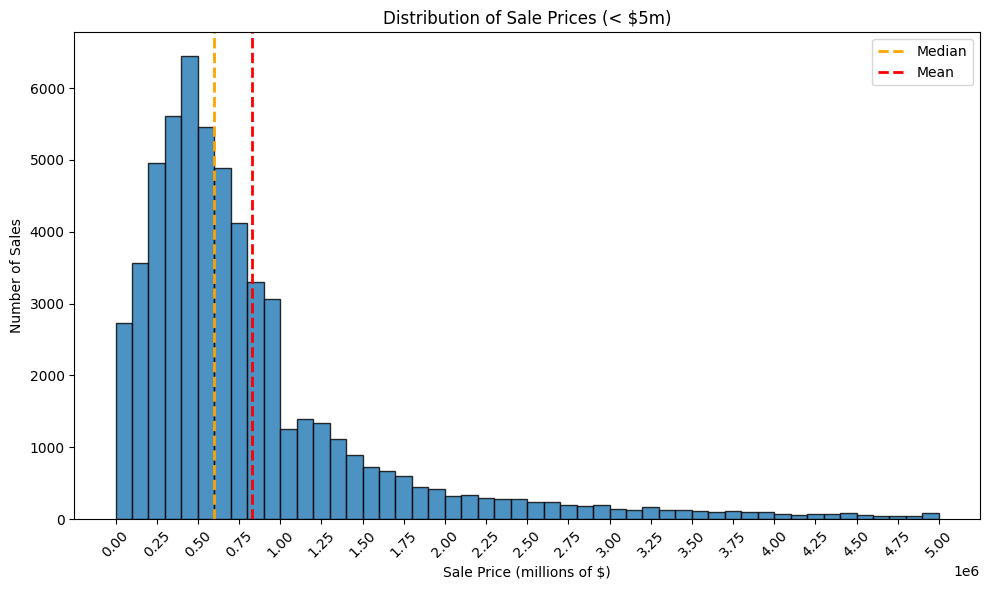

In [183]:
# Filter out sale prices above 5,000,000
filtered_df = df[df['sale_price'] <= 5000000]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['sale_price'], bins=50, edgecolor='black', alpha=0.8)
plt.xlabel('Sale Price (millions of $)')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sale Prices (< $5m)')
plt.xticks(range(0, 5000001, 250000), rotation=45)  # Set x-axis ticks at every 250,000

# Calculate mean and median
mean_price = filtered_df['sale_price'].mean()
median_price = filtered_df['sale_price'].median()

# Add vertical lines for mean and median
plt.axvline(median_price, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Mean')

plt.legend() 
plt.tight_layout()
plt.show()

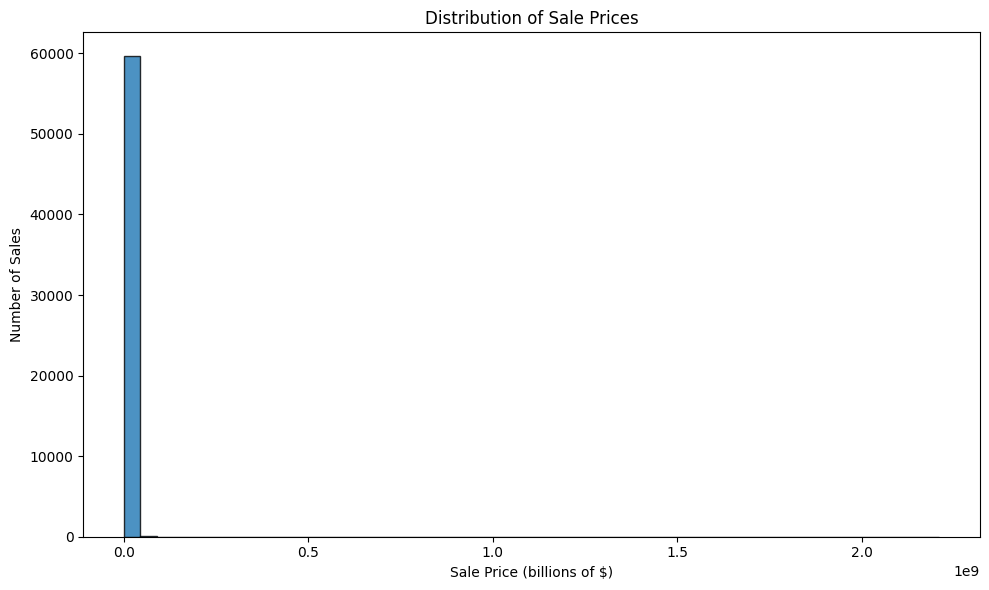

In [184]:
# Create the histogram 
plt.figure(figsize=(10, 6))
plt.hist(df['sale_price'], bins=50, edgecolor='black', alpha=0.8)
plt.xlabel('Sale Price (billions of $)')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sale Prices')
plt.tight_layout()
plt.show()

borough_names
Manhattan        1150000.0
Brooklyn          752626.0
Queens            495000.0
Staten Island     465000.0
The Bronx         400000.0
Name: sale_price, dtype: float64
borough_names
Manhattan        14439
Brooklyn         15690
Queens           18441
Staten Island     6011
The Bronx         5178
Name: count, dtype: int64


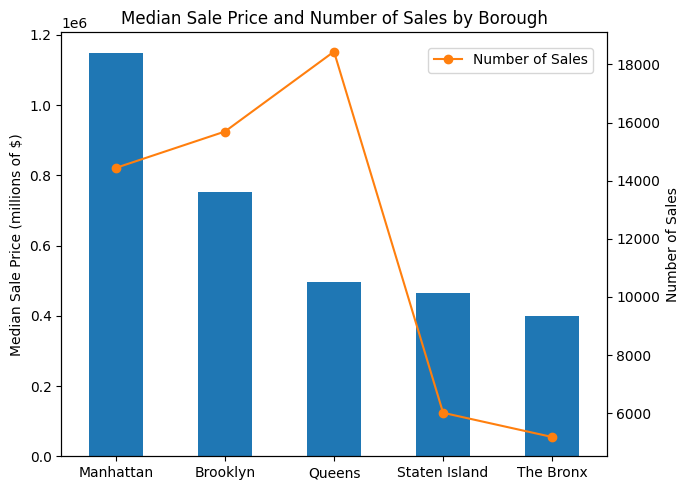

In [180]:
# Create the bar plot for median sale price and number of sales by borough
median_sale_by_borough = df.groupby('borough_names')['sale_price'].median().sort_values(ascending=False)
count_sales_by_borough = df['borough_names'].value_counts().loc[median_sale_by_borough.index]

plt.figure(figsize=(7, 5))
ax1 = median_sale_by_borough.plot(kind='bar', label='Median Sale Price')
plt.xlabel('')
plt.ylabel('Median Sale Price (millions of $)')
plt.title('Median Sale Price and Number of Sales by Borough')
plt.xticks(rotation=0)

ax2 = ax1.twinx()  
ax2.plot(count_sales_by_borough.index, count_sales_by_borough.values, color='tab:orange', marker='o', label='Number of Sales')
ax2.set_ylabel('Number of Sales')
ax2.tick_params(axis='y')

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.66, 0.98))  
plt.show()

In [191]:
building_class_mapping = {
    '07 RENTALS - WALKUP APARTMENTS             ': 'RENTALS-WALKUP APARTMENTS',
    '08 RENTALS - ELEVATOR APARTMENTS           ': 'RENTALS-ELEVATOR APARTMENTS',
    '09 COOPS - WALKUP APARTMENTS               ': 'COOPS-WALKUP APARTMENTS',
    '14 RENTALS - 4-10 UNIT                     ': 'RENTALS-4-10 UNIT',
    '22 STORE BUILDINGS                         ': 'STORE BUILDINGS',
    '01 ONE FAMILY DWELLINGS                    ': 'ONE FAMILY DWELLINGS',
    '02 TWO FAMILY DWELLINGS                    ': 'TWO FAMILY DWELLINGS',
    '03 THREE FAMILY DWELLINGS                  ': 'THREE FAMILY DWELLINGS',
    '21 OFFICE BUILDINGS                        ': 'OFFICE BUILDINGS',
    '23 LOFT BUILDINGS                          ': 'LOFT BUILDINGS',
    '25 LUXURY HOTELS                           ': 'LUXURY HOTELS',
    '26 OTHER HOTELS                            ': 'OTHER HOTELS',
    '37 RELIGIOUS FACILITIES                    ': 'RELIGIOUS FACILITIES',
    '38 ASYLUMS AND HOMES                       ': 'ASYLUMS AND HOMES',
    '29 COMMERCIAL GARAGES                      ': 'COMMERCIAL GARAGES',
    '41 TAX CLASS 4 - OTHER                     ': 'TAX CLASS 4-OTHER',
    '30 WAREHOUSES                              ': 'WAREHOUSES',
    '34 THEATRES                                ': 'THEATRES',
    '27 FACTORIES                               ': 'FACTORIES',
    '40 SELECTED GOVERNMENTAL FACILITIES        ': 'SELECTED GOVERNMENTAL FACILITIES',
    '32 HOSPITAL AND HEALTH FACILITIES          ': 'HOSPITAL AND HEALTH FACILITIES',
    '10 COOPS - ELEVATOR APARTMENTS             ': 'COOPS-ELEVATOR APARTMENTS',
    '31 COMMERCIAL VACANT LAND                  ': 'COMMERCIAL VACANT LAND',
    '11A CONDO-RENTALS                          ': 'CONDO-RENTALS',
    '33 EDUCATIONAL FACILITIES                  ': 'EDUCATIONAL FACILITIES',
    '04 TAX CLASS 1 CONDOS                      ': 'TAX CLASS 1 CONDOS',
    '05 TAX CLASS 1 VACANT LAND                 ': 'TAX CLASS 1 VACANT LAND',
    '06 TAX CLASS 1 - OTHER                     ': 'TAX CLASS 1-OTHER',
    '12 CONDOS - WALKUP APARTMENTS              ': 'CONDOS-WALKUP APARTMENTS',
    '13 CONDOS - ELEVATOR APARTMENTS            ': 'CONDOS-ELEVATOR APARTMENTS',
    '36 OUTDOOR RECREATIONAL FACILITIES         ': 'OUTDOOR RECREATIONAL FACILITIES',
    '44 CONDO PARKING                           ': 'CONDO PARKING',
    '43 CONDO OFFICE BUILDINGS                  ': 'CONDO OFFICE BUILDINGS',
    '47 CONDO NON-BUSINESS STORAGE              ': 'CONDO NON-BUSINESS STORAGE',
    '46 CONDO STORE BUILDINGS                   ': 'CONDO STORE BUILDINGS',
    '35 INDOOR PUBLIC AND CULTURAL FACILITIES   ': 'INDOOR PUBLIC AND CULTURAL FACILITIES',
    '17 CONDO COOPS                             ': 'CONDO COOPS',
    '15 CONDOS - 2-10 UNIT RESIDENTIAL          ': 'CONDOS-2-10 UNIT RESIDENTIAL',
    '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ': 'CONDOS-2-10 UNIT WITH COMMERCIAL UNIT',
    '48 CONDO TERRACES/GARDENS/CABANAS          ': 'CONDO TERRACES/GARDENS/CABANAS',
    '28 COMMERCIAL CONDOS                       ': 'COMMERCIAL CONDOS',
    '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ': 'CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
    '45 CONDO HOTELS                            ': 'CONDO HOTELS',
    '11 SPECIAL CONDO BILLING LOTS              ': 'SPECIAL CONDO BILLING LOTS',
    '39 TRANSPORTATION FACILITIES               ': 'TRANSPORTATION FACILITIES',
    '49 CONDO WAREHOUSES/FACTORY/INDUS          ': 'CONDO WAREHOUSES/FACTORY/INDUS'
}

df['building_class_group'] = df['building_class_category'].map(building_class_mapping)


In [192]:
# Mapping for grouping building class categories
group_mapping = {
    'Apartment Rentals': ['RENTALS-WALKUP APARTMENTS', 'RENTALS-ELEVATOR APARTMENTS'],
    'Cooperative Apartments': ['COOPS-WALKUP APARTMENTS', 'COOPS-ELEVATOR APARTMENTS'],
    'Small Rental Buildings': ['RENTALS-4-10 UNIT'],
    'Residential Houses': ['ONE FAMILY DWELLINGS', 'TWO FAMILY DWELLINGS', 'THREE FAMILY DWELLINGS'],
    'Commercial and Public Facilities': ['STORE BUILDINGS', 'OFFICE BUILDINGS', 'LOFT BUILDINGS', 'LUXURY HOTELS', 'OTHER HOTELS', 'COMMERCIAL GARAGES', 'WAREHOUSES', 'FACTORIES', 'COMMERCIAL VACANT LAND', 'EDUCATIONAL FACILITIES', 'THEATRES', 'INDOOR PUBLIC AND CULTURAL FACILITIES', 'RELIGIOUS FACILITIES', 'ASYLUMS AND HOMES', 'OUTDOOR RECREATIONAL FACILITIES', 'TRANSPORTATION FACILITIES'],
    'Special Tax Classes and Condos': ['TAX CLASS 4-OTHER', 'SELECTED GOVERNMENTAL FACILITIES', 'HOSPITAL AND HEALTH FACILITIES', 'CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC', 'CONDO OFFICE BUILDINGS', 'CONDO PARKING', 'CONDO HOTELS', 'CONDO STORE BUILDINGS', 'CONDO NON-BUSINESS STORAGE', 'CONDO TERRACES/GARDENS/CABANAS', 'CONDO WAREHOUSES/FACTORY/INDUS', 'SPECIAL CONDO BILLING LOTS']
}

building_class_group
Apartment Rentals                   1745000.0
Commercial and Public Facilities    1650000.0
Small Rental Buildings              1388500.0
Other                                899000.0
Residential Houses                   578835.5
Cooperative Apartments               400000.0
Special Tax Classes and Condos       203372.0
Name: sale_price, dtype: float64
building_class_group
Residential Houses                  25578
Other                               15147
Cooperative Apartments              14053
Apartment Rentals                    2013
Commercial and Public Facilities     1747
Special Tax Classes and Condos        884
Small Rental Buildings                337
dtype: int64


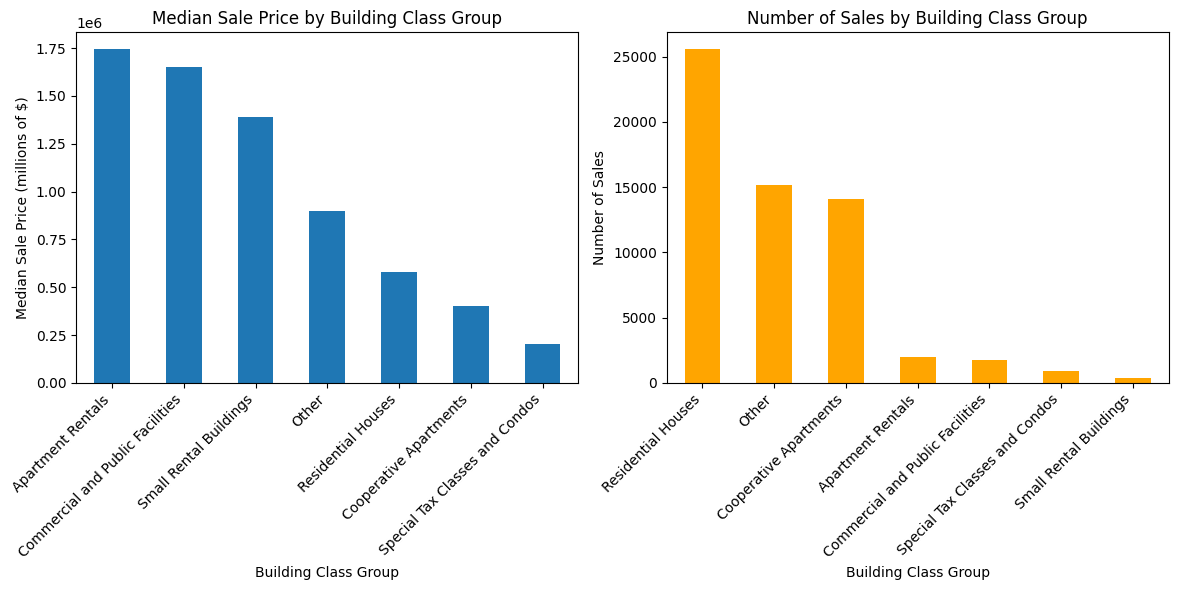

In [193]:
# Create a function to map categories to groups
def map_to_group(category):
    for group, categories in group_mapping.items():
        if category in categories:
            return group
    return 'Other'

# Create a new column for building class group
df['building_class_group'] = df['building_class_category'].map(building_class_mapping).apply(map_to_group)

plt.figure(figsize=(12, 6))

# Calculate median sale price and count by building class group
median_price_by_group = df.groupby('building_class_group')['sale_price'].median().sort_values(ascending=False)
count_by_group = df.groupby('building_class_group').size().sort_values(ascending=False)
print(median_price_by_group)
print(count_by_group)

# Plot median sale price
plt.subplot(1, 2, 1)
median_price_by_group.plot(kind='bar')
plt.xlabel('Building Class Group')
plt.ylabel('Median Sale Price (millions of $)')
plt.title('Median Sale Price by Building Class Group')
plt.xticks(rotation=45, ha='right')

# Plot count
plt.subplot(1, 2, 2)
count_by_group.plot(kind='bar', color='orange')
plt.xlabel('Building Class Group')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Building Class Group')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


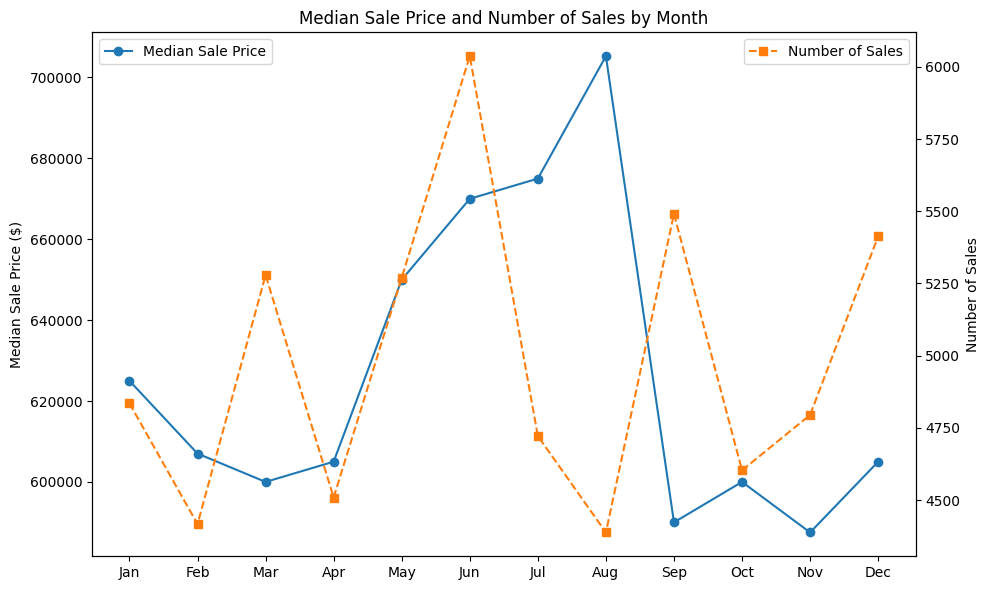

In [209]:
# Create the line plot for median sale price and number of sales by month
median_sale_by_month = df.groupby('month')['sale_price'].median()
median_count_by_month = df.groupby('month')['sale_price'].count()

month_labels = [calendar.month_abbr[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))

# Plot median sale price on the primary axis
ax1 = median_sale_by_month.plot(kind='line', marker='o', label='Median Sale Price')
ax1.set_xlabel('')
ax1.set_ylabel('Median Sale Price ($)')
ax1.set_title('Median Sale Price and Number of Sales by Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_labels, rotation=0)

# Create a secondary y-axis for number of sales
ax2 = ax1.twinx()
ax2.plot(median_count_by_month.index, median_count_by_month.values, color='tab:orange', linestyle='dashed', marker='s', label='Number of Sales')
ax2.set_ylabel('Number of Sales')
ax2.legend(loc='upper right')

# Display both plots
ax1.legend(loc='upper left')  # Add legend for median sale price
plt.tight_layout()
plt.show()


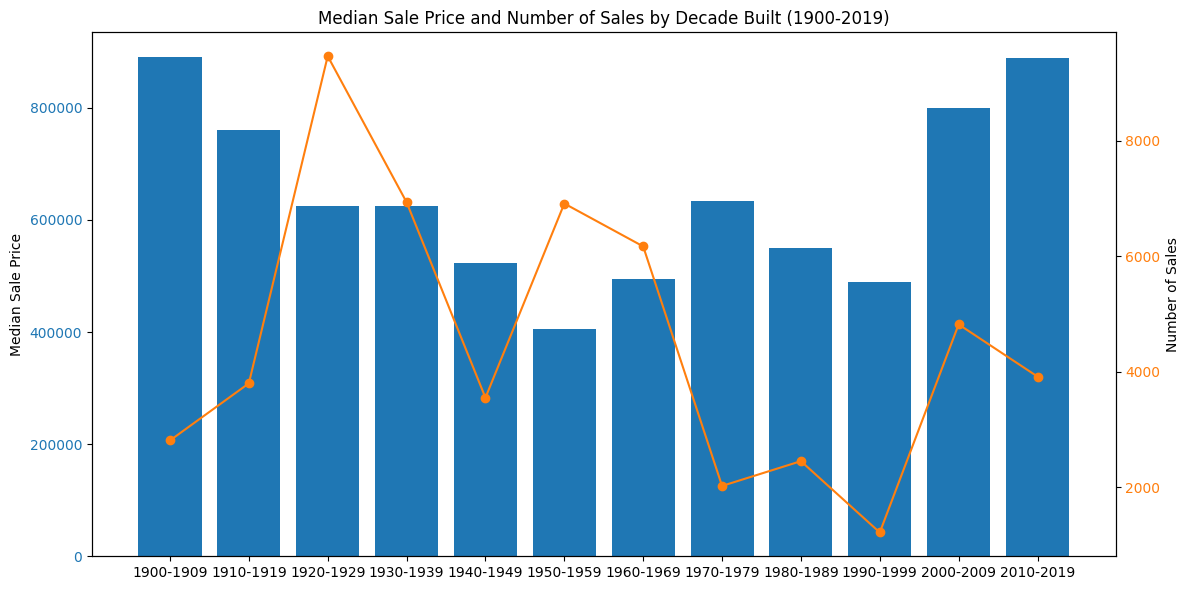

In [185]:
# Filter out sale prices above $500,000,000
filtered_df = df[df['sale_price'] <= 5000000000]

# Filter out properties built before 1830
filtered_df = filtered_df[filtered_df['year_built'] >= 1899]

# Create decade bins starting from 1830
decade_bins = list(range(1900, 2021, 10))  # Ending at 2040 to include the last decade
decade_labels = [f"{start}-{start+9}" for start in decade_bins[:-1]]  # Exclude the last label

# Assign each record to its corresponding decade
filtered_df['decade'] = pd.cut(filtered_df['year_built'], bins=decade_bins, labels=decade_labels, right=False)

# Calculate median sale price and count by decade
median_price_and_count_by_decade = filtered_df.groupby('decade')['sale_price'].agg(['median', 'count'])

plt.figure(figsize=(12, 6))

# Bar plot for median sale price
plt.bar(median_price_and_count_by_decade.index, median_price_and_count_by_decade['median'], label='Median Sale Price')
plt.ylabel('Median Sale Price')
plt.tick_params(axis='y', labelcolor='tab:blue')

# Line plot for count of number of sales
ax2 = plt.gca().twinx()
ax2.plot(median_price_and_count_by_decade.index, median_price_and_count_by_decade['count'], color='tab:orange', marker='o', label='Number of Sales')
ax2.set_ylabel('Number of Sales')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.xlabel('Decade')
plt.title('Median Sale Price and Number of Sales by Decade Built (1900-2019)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
